<a href="https://colab.research.google.com/github/ravi-gopalan/DAND_Data_Wrangling/blob/master/object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install ImageAI

     |████████████████████████████████| 184kB 3.5MB/s 


In [4]:
!pip freeze

absl-py==0.8.1
alabaster==0.7.12
albumentations==0.1.12
altair==3.3.0
asgiref==3.2.3
astor==0.8.0
astropy==3.0.5
atari-py==0.2.6
atomicwrites==1.3.0
attrs==19.3.0
audioread==2.1.8
autograd==1.3
Babel==2.7.0
backcall==0.1.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.6.3
bleach==3.1.0
blis==0.2.4
bokeh==1.0.4
boto==2.49.0
boto3==1.10.32
botocore==1.13.32
Bottleneck==1.3.1
branca==0.3.1
bs4==0.0.1
bz2file==0.98
cachetools==3.1.1
certifi==2019.11.28
cffi==1.13.2
chainer==6.5.0
chardet==3.0.4
chart-studio==1.0.0
Click==7.0
cloudpickle==1.2.2
cmake==3.12.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.2.0
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.0
cupy-cuda101==6.5.0
cvxopt==1.2.3
cvxpy==1.0.25
cycler==0.10.0
cymem==2.0.3
Cython==0.29.14
daft==0.0.4
dask==1.1.5
dataclasses==0.7
datascience==0.10.6
decorator==4.4.1
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.1.1
distributed==1.25.3
Django==3.0
dlib==19.18.0
dm-sonnet==1.3

In [0]:
from urllib.request import urlretrieve
import imageai



In [7]:
print('Beginning file download with urllib...')

url = 'https://github.com/OlafenwaMoses/ImageAI/releases/download/1.0/resnet50_coco_best_v2.0.1.h5'
urlretrieve(url,'resnet50_coco_best_v2.0.1.h5')



Beginning file download with urllib...


('resnet50_coco_best_v2.0.1.h5', <http.client.HTTPMessage at 0x7fabe08af358>)

In [8]:
!ls

resnet50_coco_best_v2.0.1.h5  sample_data


In [9]:
from imageai.Detection import ObjectDetection
import os

Using TensorFlow backend.


In [11]:
detector = ObjectDetection()
detector.setModelTypeAsRetinaNet()
detector.setModelPath( "resnet50_coco_best_v2.0.1.h5")
detector.loadModel()













Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [12]:
image_url = 'https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/06/I1_2009_09_08_drive_0012_001351-768x223.png'
urlretrieve(image_url,'image.png')


('image.png', <http.client.HTTPMessage at 0x7fabe0cfe6d8>)

In [0]:
import os

In [0]:
execution_path = os.getcwd()

In [0]:
custom_objects = detector.CustomObjects(person=True, car=False)
detections = detector.detectCustomObjectsFromImage(\
                                                   input_image=os.path.join(execution_path , "image.png"), \
                                                   output_image_path=os.path.join(execution_path , "image_new.png"), \
                                                   custom_objects=custom_objects, minimum_percentage_probability=65)

In [0]:
import pprint

In [31]:
for eachObject in detections:
  print(eachObject['name'], ' : ', str(eachObject['percentage_probability']))

person  :  75.89707374572754
person  :  67.2625720500946


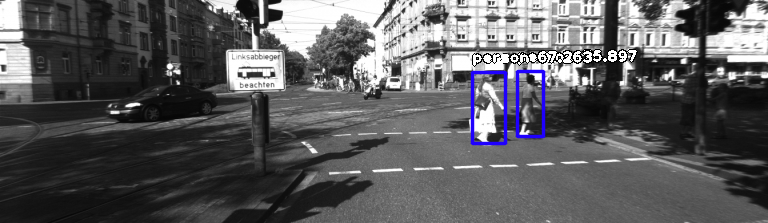

In [32]:
from IPython.display import Image
Image("image_new.png")

In [0]:
detections_2 = detector.detectCustomObjectsFromImage(input_image="dish_image.jpg", \
                                                   output_image_path="dish_image_new.png", \
                                                   custom_objects=custom_objects, minimum_percentage_probability=65)

In [38]:
detections_2

[]

In [0]:
for eachObject in detections_2:
  print(eachObject['name'], ' : ', str(eachObject['percentage_probability']))

In [37]:
Image("dish_image.jpg")